# **Importing Libraries**

In [232]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import random
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# **Get The Dataset**

In [233]:
df = pd.read_csv('https://raw.githubusercontent.com/al-mehedi-hasan-afridi/Monitoring-and-Detection-of-COVID-19-using-IoT-and-ML/master/Dataset/COVID-19/Final%20Covid%20data.csv')
df

,Temperature,Cough,Pulse Rate,SPO2,Status
0,35.50,1,115,91,Covid
1,35.60,1,88,80,Covid
2,35.20,1,78,95,Covid
3,35.30,0,102,97,Covid
4,36.10,1,130,96,Covid
...,...,...,...,...,...
293,36.06,0,117,97,Healthy
294,35.56,0,79,100,Healthy
295,36.67,0,78,100,Healthy
296,36.11,0,99,100,Healthy


# **Prepare The Data for Machine Learning Models**

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  298 non-null    float64
 1   Cough        298 non-null    int64  
 2   Pulse Rate   298 non-null    int64  
 3   SPO2         298 non-null    int64  
 4   Status       298 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB


In [235]:
df.Status[df.Status == 'Covid'] = 1
df.Status[df.Status == 'Healthy'] = 0
df

<ipython-input-235-7a2e0f2d67ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[df.Status == 'Covid'] = 1
<ipython-input-235-7a2e0f2d67ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[df.Status == 'Healthy'] = 0


,Temperature,Cough,Pulse Rate,SPO2,Status
0,35.50,1,115,91,1
1,35.60,1,88,80,1
2,35.20,1,78,95,1
3,35.30,0,102,97,1
4,36.10,1,130,96,1
...,...,...,...,...,...
293,36.06,0,117,97,0
294,35.56,0,79,100,0
295,36.67,0,78,100,0
296,36.11,0,99,100,0


In [236]:
df['Status'].value_counts()

1    194
0    104
Name: Status, dtype: int64

# **Visualizing The Data**

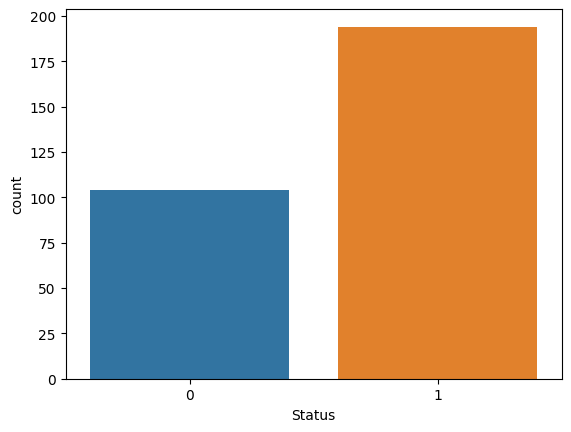

In [237]:
sns.countplot(x="Status",data=df)
plt.show()

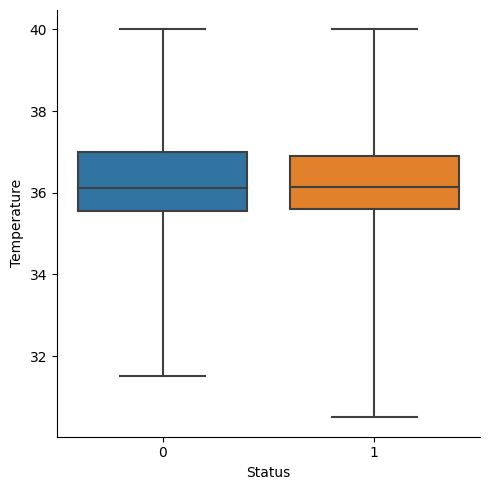

In [238]:
sns.catplot(x="Status",y="Temperature",data=df,kind="box",whis=[0,100])
plt.show()

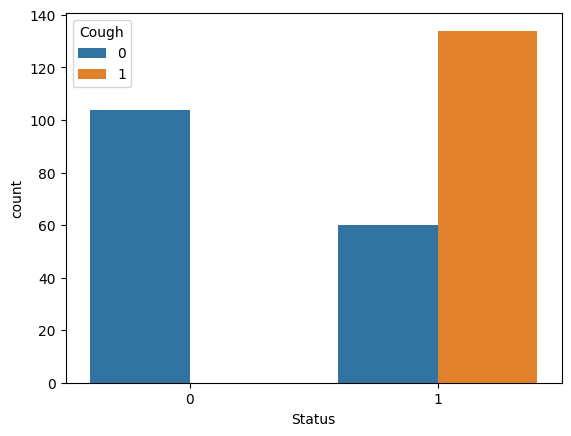

In [239]:
sns.countplot(x="Status",data=df,hue="Cough")
plt.show()

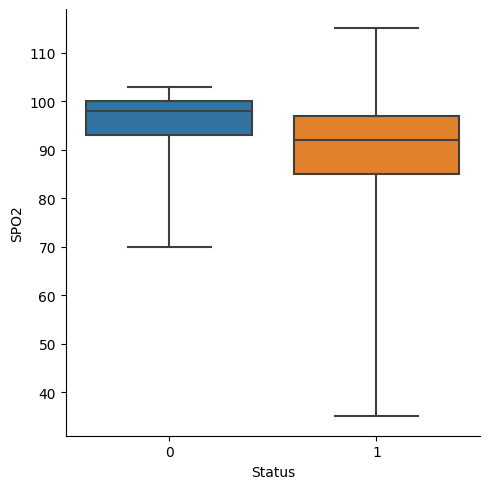

In [240]:
sns.catplot(x="Status",y="SPO2",data=df,kind="box",whis=[0,100])
plt.show()

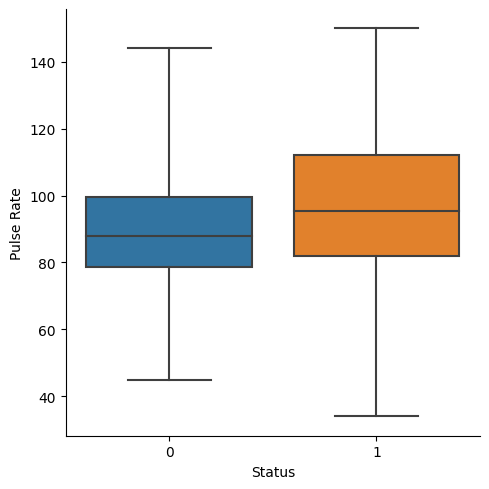

In [241]:
sns.catplot(x="Status",y="Pulse Rate",data=df,kind="box",whis=[0,100])
plt.show()

# **Train and Test set. Different models and Cross-validation**

In [242]:
kf = KFold(n_splits = 5) 

In [243]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

X=df[['Temperature','Cough','Pulse Rate','SPO2']]
y=df['Status'].astype('int')

# Apply SMOTE over-sampling
smote = SMOTE(random_state=45)
X, y = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

print(sorted(Counter(y).items()), y.shape)

[(0, 194), (1, 194)] (388,)


In [244]:
df['Status'].value_counts()

1    194
0    194
Name: Status, dtype: int64

In [245]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=45)

In [246]:
dtc = DecisionTreeClassifier(random_state=45)
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy of DTC:", train_accuracy)
print("Test Accuracy of DTC:", test_accuracy)


Classification Error: 0.1217948717948718
Precision:  0.8923076923076924
Recall:  0.8285714285714286
f1:  0.8592592592592593
Train Accuracy of DTC: 1.0
Test Accuracy of DTC: 0.8782051282051282


In [247]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=45)
rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
specificity = recall_score(y_test, y_test_pred, pos_label=0)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy of RFC:", train_accuracy)
print("Test Accuracy of RFC:", test_accuracy)



Classification Error: 0.10897435897435892
Precision:  0.9206349206349206
Recall:  0.8285714285714286
f1:  0.8721804511278196
Train Accuracy of RFC: 1.0
Test Accuracy of RFC: 0.8910256410256411


In [248]:
logreg = LogisticRegression(random_state=45)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
specificity = recall_score(y_test, y_test_pred, pos_label=0)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy of logistics regression :", train_accuracy)
print("Test Accuracy of logistics regression:", test_accuracy)

Classification Error: 0.16025641025641024
Precision:  0.8947368421052632
Recall:  0.7285714285714285
f1:  0.8031496062992126
Train Accuracy of logistics regression : 0.8362068965517241
Test Accuracy of logistics regression: 0.8397435897435898


In [249]:
svm = SVC(random_state=45)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy of svm:", train_accuracy)
print("Test Accuracy of svm:", test_accuracy)

Classification Error: 0.33974358974358976
Precision:  0.639344262295082
Recall:  0.5571428571428572
f1:  0.5954198473282444
Train Accuracy of svm: 0.6163793103448276
Test Accuracy of svm: 0.6602564102564102


In [250]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision1 = precision_score(y_test, y_test_pred)
recall1 = recall_score(y_test, y_test_pred)
f11 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy of naive bayes:", train_accuracy)
print("Test Accuracy of naive bayes:", test_accuracy)



Classification Error: 0.13461538461538458
Precision:  0.639344262295082
Recall:  0.5571428571428572
f1:  0.5954198473282444
Train Accuracy of naive bayes: 0.8448275862068966
Test Accuracy of naive bayes: 0.8653846153846154


# **Hyperparameter Tuning**

In [251]:
param_grid = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]
}
grid_search_dtc = GridSearchCV(dtc, param_grid, verbose=1, cv=5)

In [252]:
grid_search_dtc.fit(X_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [253]:
grid_search_dtc.best_params_

{'max_leaf_nodes': 19, 'min_samples_split': 3}

Classification Error: 0.08974358974358976
Precision:  0.9516129032258065
Recall:  0.8428571428571429
f1:  0.8939393939393939
Train Accuracy DTC: 0.9698275862068966
Test Accuracy DTC: 0.9102564102564102
[[83  3]
 [11 59]]


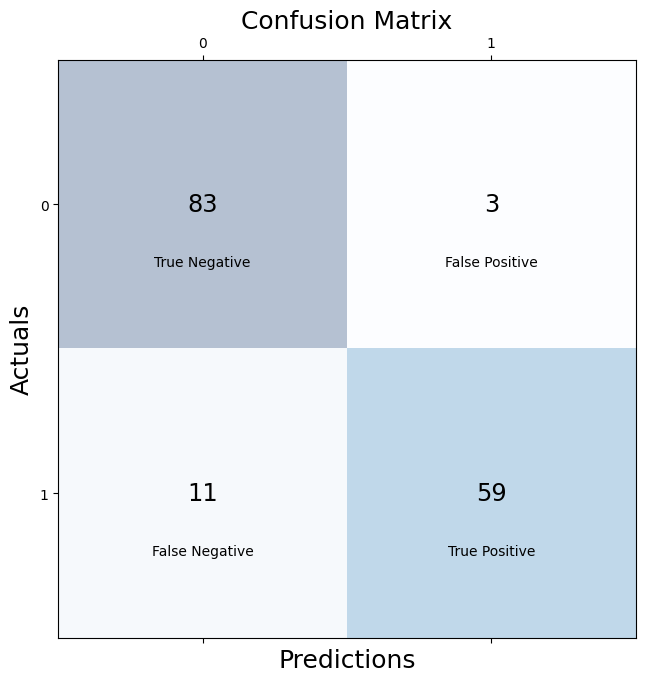

In [254]:
seed_value = 45
np.random.seed(seed_value)
random.seed(seed_value)

dtc_final = DecisionTreeClassifier(max_leaf_nodes = 19, min_samples_split = 3)
dtc_final.fit(X_train,y_train)

y_train_pred = dtc_final.predict(X_train)
y_test_pred = dtc_final.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy DTC:", train_accuracy)
print("Test Accuracy DTC:", test_accuracy)
print(cm)

# Confusion matrix figure
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

ax.text(1, 0.2, 'False Positive', ha='center', va='center')
ax.text(0, 0.2, 'True Negative', ha='center', va='center')
ax.text(0, 1.2, 'False Negative', ha='center', va='center')
ax.text(1, 1.2, 'True Positive', ha='center', va='center')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [255]:
np.random.seed(45)
param_grid={'max_depth':[3,5,10],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }
grid_search_rfc = GridSearchCV(rfc, param_grid, cv=5)


In [256]:
grid_search_rfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45),
             param_grid={'max_depth': [3, 5, 10], 'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [10, 100, 200]})

In [257]:
grid_search_rfc.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 10}

Classification Error: 0.11538461538461542
Precision:  0.9193548387096774
Recall:  0.8142857142857143
f1:  0.8636363636363636
Train Accuracy RFC: 0.9396551724137931
Test Accuracy RFC: 0.8846153846153846
[[81  5]
 [13 57]]


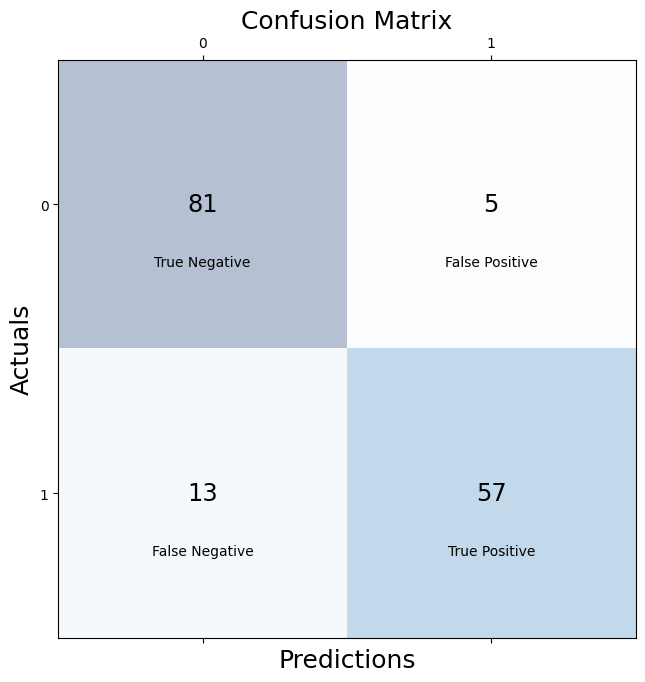

In [258]:
seed_value = 45
np.random.seed(seed_value)
random.seed(seed_value)

rfc_final = RandomForestClassifier(max_depth = 10, max_features = 3, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 10)
rfc_final.fit(X_train,y_train)

y_train_pred = rfc_final.predict(X_train)
y_test_pred = rfc_final.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy RFC:", train_accuracy)
print("Test Accuracy RFC:", test_accuracy)
print(cm)

# Confusion matrix figure
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

ax.text(1, 0.2, 'False Positive', ha='center', va='center')
ax.text(0, 0.2, 'True Negative', ha='center', va='center')
ax.text(0, 1.2, 'False Negative', ha='center', va='center')
ax.text(1, 1.2, 'True Positive', ha='center', va='center')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [259]:
param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5)


In [260]:
grid_search_logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=45),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [261]:
grid_search_logreg.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

Classification Error: 0.16025641025641024
Precision:  0.8947368421052632
Recall:  0.7285714285714285
f1:  0.8031496062992126
Train Accuracy logistics regression : 0.8362068965517241
Test Accuracy logistics regression: 0.8397435897435898
[[80  6]
 [19 51]]


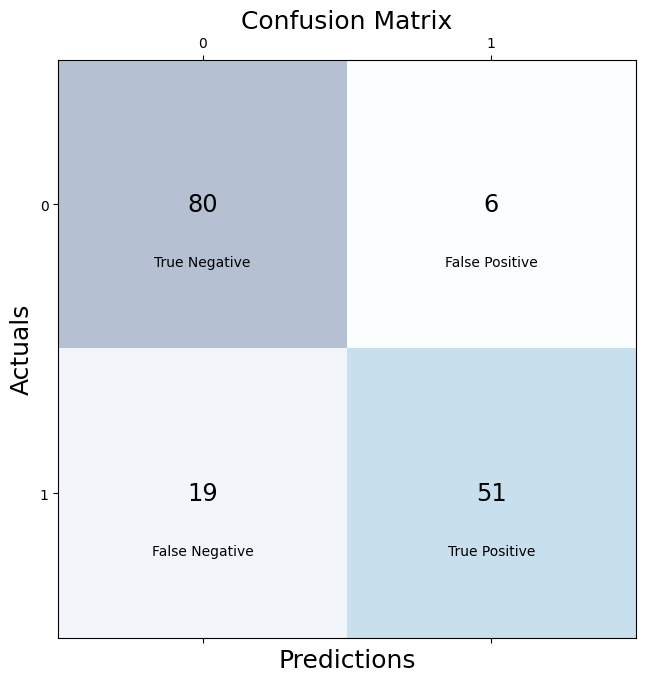

In [262]:
logreg_final = LogisticRegression(C = 1.0, penalty = 'l2', solver = 'newton-cg')
logreg_final.fit(X_train,y_train)

y_train_pred = logreg_final.predict(X_train)
y_test_pred = logreg_final.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy logistics regression :", train_accuracy)
print("Test Accuracy logistics regression:", test_accuracy)
print(cm)

# Confusion matrix figure
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

ax.text(1, 0.2, 'False Positive', ha='center', va='center')
ax.text(0, 0.2, 'True Negative', ha='center', va='center')
ax.text(0, 1.2, 'False Negative', ha='center', va='center')
ax.text(1, 1.2, 'True Positive', ha='center', va='center')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [263]:
param_grid = { 
  'C': [0.001, 0.1, 1, 10, 100], 
  'kernel' : ['linear', 'rbf'],
  'gamma': [0.001, 0.1, 1, 10, 100]
}
grid_search_svm = GridSearchCV(svm, param_grid, cv=5)


In [264]:
grid_search_svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=45),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']})

In [265]:
grid_search_svm.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Classification Error: 0.13461538461538458
Precision:  0.9622641509433962
Recall:  0.7285714285714285
f1:  0.8292682926829268
Train Accuracy of svm: 0.8793103448275862
Test Accuracy of svm: 0.8653846153846154
[[84  2]
 [19 51]]


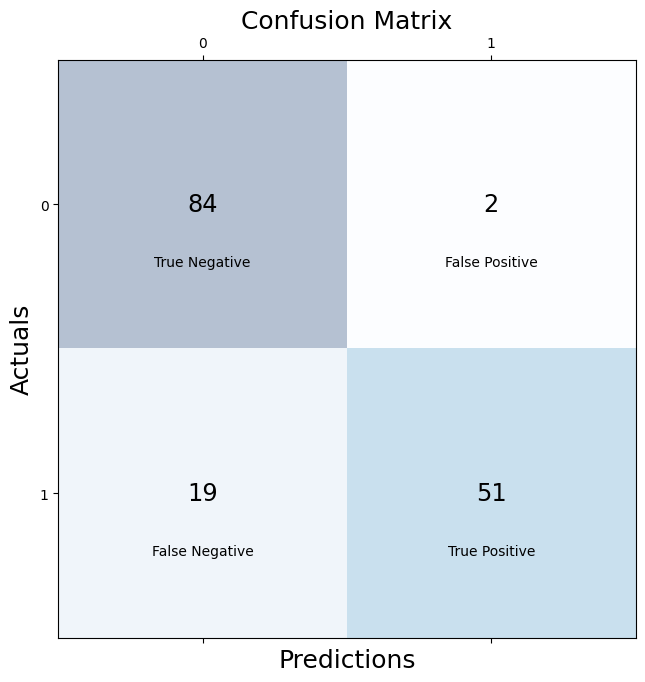

In [266]:
svm_final = SVC(C = 100, gamma = 0.001, kernel = 'rbf')
svm_final.fit(X_train,y_train)

y_train_pred = svm_final.predict(X_train)
y_test_pred = svm_final.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy of svm:", train_accuracy)
print("Test Accuracy of svm:", test_accuracy)
print(cm)

# Confusion matrix figure
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

ax.text(1, 0.2, 'False Positive', ha='center', va='center')
ax.text(0, 0.2, 'True Negative', ha='center', va='center')
ax.text(0, 1.2, 'False Negative', ha='center', va='center')
ax.text(1, 1.2, 'True Positive', ha='center', va='center')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [267]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid_search_gnb = GridSearchCV(gnb, param_grid, cv=5)

In [268]:
grid_search_gnb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [269]:
grid_search_gnb.best_params_

{'var_smoothing': 0.0005336699231206307}

Classification Error: 0.16025641025641024
Precision:  0.8688524590163934
Recall:  0.7571428571428571
f1:  0.8091603053435115
Train Accuracy of naive bayes: 0.8362068965517241
Test Accuracy of naive bayes: 0.8397435897435898
[[78  8]
 [17 53]]


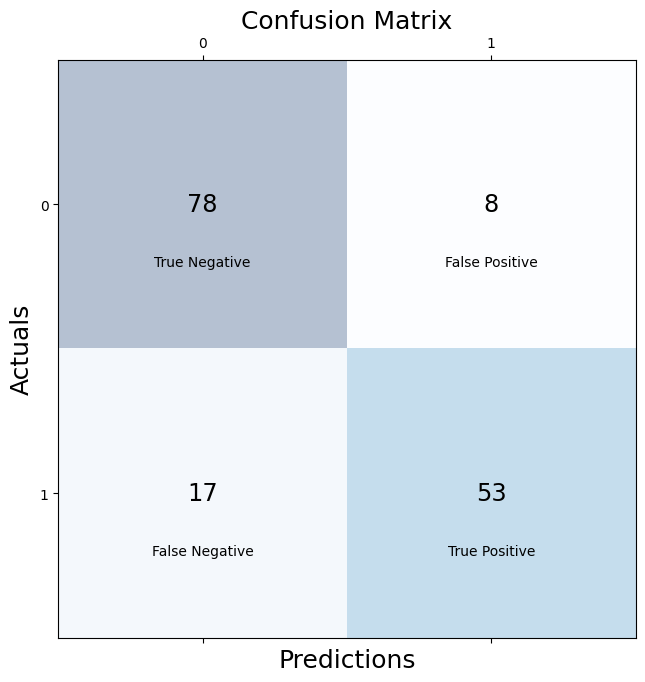

In [270]:
gnb_final = GaussianNB(var_smoothing =  0.0005336699231206307)
gnb_final.fit(X_train,y_train)

y_train_pred = gnb_final.predict(X_train)
y_test_pred = gnb_final.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)

classification_error = 1 - test_accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
specificity = recall_score(y_test, y_test_pred, pos_label=0)
f1 = f1_score(y_test, y_test_pred) 

print("Classification Error:", classification_error)
print('Precision: ',precision)
print('Recall: ',recall)
print('f1: ',f1)
print("Train Accuracy of naive bayes:", train_accuracy)
print("Test Accuracy of naive bayes:", test_accuracy)
print(cm)

# Confusion matrix figure
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

ax.text(1, 0.2, 'False Positive', ha='center', va='center')
ax.text(0, 0.2, 'True Negative', ha='center', va='center')
ax.text(0, 1.2, 'False Negative', ha='center', va='center')
ax.text(1, 1.2, 'True Positive', ha='center', va='center')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [271]:
input_data=(35,0,115,88)
input_data_as_numpy_array=np.asarray(input_data)
reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=dtc_final.predict(reshape)

print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


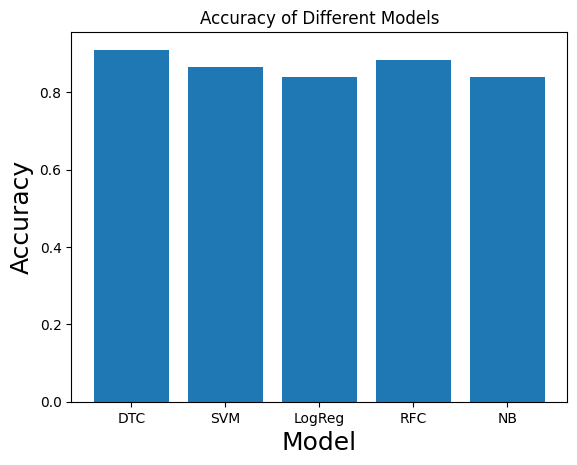

In [272]:
model_accuracy = {
    'DTC': 0.9102564102564102,
    'SVM': 0.8653846153846154,
    'LogReg':0.8397435897435898,
    'RFC': 0.8846153846153846,
    'NB': 0.8397435897435898
}

model_names = list(model_accuracy.keys())
accuracy_scores = list(model_accuracy.values())

plt.bar(model_names, accuracy_scores)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('Accuracy of Different Models')
plt.show()